In [6]:
%matplotlib inline
import serpentTools
detFile = '../models/bwr_det0.m'
depFile = '../models/bwr_dep.m'
coeFile = '../models/branching.coe'

# Detectors

In [7]:
%time
det = serpentTools.read(detFile)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [8]:
det.detectors

{'spectrum': <serpentTools.objects.containers.Detector at 0x7f69a42558d0>,
 'xyOneGroupMesh': <serpentTools.objects.containers.Detector at 0x7f69a4255240>,
 'xymesh': <serpentTools.objects.containers.Detector at 0x7f69a42559e8>}

In [9]:
spectrum = det.detectors['spectrum']
xy = det.detectors['xymesh']

In [10]:
xy.bins # full tally matrix stored here

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.93516e+17, 5.08000e-03],
       [2.00000e+00, 1.00000e+00, 1.00000e+00, ..., 2.00000e+00,
        7.32316e+17, 4.73000e-03],
       [3.00000e+00, 1.00000e+00, 1.00000e+00, ..., 3.00000e+00,
        6.76055e+17, 4.80000e-03],
       ...,
       [7.98000e+02, 2.00000e+00, 1.00000e+00, ..., 1.80000e+01,
        2.14074e+18, 2.85000e-03],
       [7.99000e+02, 2.00000e+00, 1.00000e+00, ..., 1.90000e+01,
        2.11922e+18, 2.93000e-03],
       [8.00000e+02, 2.00000e+00, 1.00000e+00, ..., 2.00000e+01,
        2.08951e+18, 2.95000e-03]])

In [11]:
print('bins shape: ', xy.bins.shape)
print('bins size: ', xy.bins.size)

bins shape:  (800, 12)
bins size:  9600


In [12]:
xy.tallies  # just tally data

array([[[7.93516e+17, 7.32316e+17, 6.76055e+17, 6.15734e+17,
         5.68526e+17, 5.26474e+17, 4.96225e+17, 4.78489e+17,
         4.65613e+17, 4.55732e+17, 4.55234e+17, 4.63142e+17,
         4.76629e+17, 4.95442e+17, 5.28180e+17, 5.71138e+17,
         6.24361e+17, 6.84708e+17, 7.39630e+17, 7.96091e+17],
        [7.32803e+17, 6.63222e+17, 5.80114e+17, 5.30323e+17,
         4.71799e+17, 4.39137e+17, 4.01528e+17, 3.89558e+17,
         3.74639e+17, 3.72965e+17, 3.71914e+17, 3.75183e+17,
         3.91788e+17, 4.02244e+17, 4.42064e+17, 4.77800e+17,
         5.29517e+17, 5.82875e+17, 6.60865e+17, 7.39508e+17],
        [6.77276e+17, 5.79028e+17, 4.47590e+17, 4.15121e+17,
         3.35368e+17, 3.24887e+17, 2.70174e+17, 2.65570e+17,
         2.52724e+17, 2.55152e+17, 2.53523e+17, 2.50582e+17,
         2.70923e+17, 2.74860e+17, 3.24525e+17, 3.40023e+17,
         4.23238e+17, 4.53097e+17, 5.82220e+17, 6.76614e+17],
        [6.17087e+17, 5.32836e+17, 4.22951e+17, 3.69062e+17,
         2.95855e+17,

In [13]:
print('xy tallies shape: ', xy.tallies.shape)
print('xy tallies size: ', xy.tallies.size)

xy tallies shape:  (2, 20, 20)
xy tallies size:  800


In [14]:
xy.errors  # relative uncertainties

array([[[0.00508, 0.00473, 0.0048 , 0.00485, 0.00503, 0.00508, 0.00511,
         0.00523, 0.00546, 0.00557, 0.00551, 0.0055 , 0.00514, 0.00476,
         0.00525, 0.00456, 0.00477, 0.0047 , 0.00458, 0.00488],
        [0.00454, 0.00486, 0.00486, 0.00504, 0.0056 , 0.00524, 0.00543,
         0.00574, 0.0057 , 0.00595, 0.00579, 0.00571, 0.00555, 0.00565,
         0.00534, 0.00542, 0.00499, 0.0053 , 0.00515, 0.00478],
        [0.00488, 0.00472, 0.00452, 0.00528, 0.00522, 0.00513, 0.00537,
         0.00615, 0.00587, 0.00565, 0.006  , 0.00597, 0.00603, 0.00545,
         0.00538, 0.00535, 0.00509, 0.00465, 0.00489, 0.00452],
        [0.00477, 0.00515, 0.00558, 0.00507, 0.00589, 0.00624, 0.00685,
         0.00684, 0.007  , 0.00653, 0.00631, 0.00681, 0.00661, 0.00675,
         0.00592, 0.0057 , 0.00519, 0.00536, 0.005  , 0.00457],
        [0.00504, 0.00532, 0.00535, 0.00579, 0.00616, 0.00775, 0.01007,
         0.0077 , 0.0072 , 0.00706, 0.00691, 0.00751, 0.00753, 0.00992,
         0.00785, 0.0065

In [15]:
xy.indexes.keys()

odict_keys(['energy', 'ymesh', 'xmesh'])

First index in `xy.tallies` corresponds to changing energy bin, then y mesh point, then x mesh point.
Grid data, spatial and energy grids, can be found in `xy.grids`

In [16]:
xy.grids

{'E': array([[0.000e+00, 6.250e-07, 3.125e-07],
        [6.250e-07, 1.000e+37, 5.000e+36]]), 'X': array([[-7.6 , -6.84, -7.22],
        [-6.84, -6.08, -6.46],
        [-6.08, -5.32, -5.7 ],
        [-5.32, -4.56, -4.94],
        [-4.56, -3.8 , -4.18],
        [-3.8 , -3.04, -3.42],
        [-3.04, -2.28, -2.66],
        [-2.28, -1.52, -1.9 ],
        [-1.52, -0.76, -1.14],
        [-0.76,  0.  , -0.38],
        [ 0.  ,  0.76,  0.38],
        [ 0.76,  1.52,  1.14],
        [ 1.52,  2.28,  1.9 ],
        [ 2.28,  3.04,  2.66],
        [ 3.04,  3.8 ,  3.42],
        [ 3.8 ,  4.56,  4.18],
        [ 4.56,  5.32,  4.94],
        [ 5.32,  6.08,  5.7 ],
        [ 6.08,  6.84,  6.46],
        [ 6.84,  7.6 ,  7.22]]), 'Y': array([[-7.6 , -6.84, -7.22],
        [-6.84, -6.08, -6.46],
        [-6.08, -5.32, -5.7 ],
        [-5.32, -4.56, -4.94],
        [-4.56, -3.8 , -4.18],
        [-3.8 , -3.04, -3.42],
        [-3.04, -2.28, -2.66],
        [-2.28, -1.52, -1.9 ],
        [-1.52, -0.76, -1.14]

If we want the subset of the mesh data that corresponds to the first listed energy group, we can obtain that with

In [17]:
xy.tallies[0]  # 2D matrix with mesh data for lowest energy group

array([[7.93516e+17, 7.32316e+17, 6.76055e+17, 6.15734e+17, 5.68526e+17,
        5.26474e+17, 4.96225e+17, 4.78489e+17, 4.65613e+17, 4.55732e+17,
        4.55234e+17, 4.63142e+17, 4.76629e+17, 4.95442e+17, 5.28180e+17,
        5.71138e+17, 6.24361e+17, 6.84708e+17, 7.39630e+17, 7.96091e+17],
       [7.32803e+17, 6.63222e+17, 5.80114e+17, 5.30323e+17, 4.71799e+17,
        4.39137e+17, 4.01528e+17, 3.89558e+17, 3.74639e+17, 3.72965e+17,
        3.71914e+17, 3.75183e+17, 3.91788e+17, 4.02244e+17, 4.42064e+17,
        4.77800e+17, 5.29517e+17, 5.82875e+17, 6.60865e+17, 7.39508e+17],
       [6.77276e+17, 5.79028e+17, 4.47590e+17, 4.15121e+17, 3.35368e+17,
        3.24887e+17, 2.70174e+17, 2.65570e+17, 2.52724e+17, 2.55152e+17,
        2.53523e+17, 2.50582e+17, 2.70923e+17, 2.74860e+17, 3.24525e+17,
        3.40023e+17, 4.23238e+17, 4.53097e+17, 5.82220e+17, 6.76614e+17],
       [6.17087e+17, 5.32836e+17, 4.22951e+17, 3.69062e+17, 2.95855e+17,
        2.56511e+17, 1.97292e+17, 2.24075e+17, 2

Or use custom [`slicing`](http://serpent-tools.readthedocs.io/en/latest/api/containers.html#serpentTools.objects.containers.DetectorBase.slice), works well for multidimensional detectors

In [18]:
xy.slice({'energy': 0})

array([[7.93516e+17, 7.32316e+17, 6.76055e+17, 6.15734e+17, 5.68526e+17,
        5.26474e+17, 4.96225e+17, 4.78489e+17, 4.65613e+17, 4.55732e+17,
        4.55234e+17, 4.63142e+17, 4.76629e+17, 4.95442e+17, 5.28180e+17,
        5.71138e+17, 6.24361e+17, 6.84708e+17, 7.39630e+17, 7.96091e+17],
       [7.32803e+17, 6.63222e+17, 5.80114e+17, 5.30323e+17, 4.71799e+17,
        4.39137e+17, 4.01528e+17, 3.89558e+17, 3.74639e+17, 3.72965e+17,
        3.71914e+17, 3.75183e+17, 3.91788e+17, 4.02244e+17, 4.42064e+17,
        4.77800e+17, 5.29517e+17, 5.82875e+17, 6.60865e+17, 7.39508e+17],
       [6.77276e+17, 5.79028e+17, 4.47590e+17, 4.15121e+17, 3.35368e+17,
        3.24887e+17, 2.70174e+17, 2.65570e+17, 2.52724e+17, 2.55152e+17,
        2.53523e+17, 2.50582e+17, 2.70923e+17, 2.74860e+17, 3.24525e+17,
        3.40023e+17, 4.23238e+17, 4.53097e+17, 5.82220e+17, 6.76614e+17],
       [6.17087e+17, 5.32836e+17, 4.22951e+17, 3.69062e+17, 2.95855e+17,
        2.56511e+17, 1.97292e+17, 2.24075e+17, 2

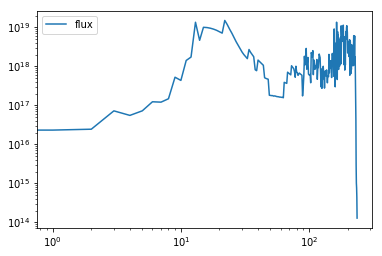

In [21]:
spectrum = det.detectors['spectrum']
labels=['flux']
spectrum.plot(loglog=True, labels=labels);

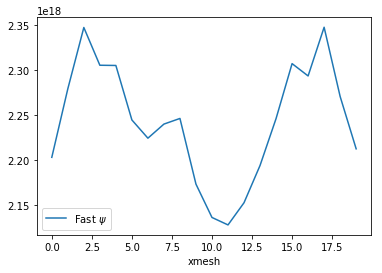

In [19]:
ax = xy.plot('xmesh', fixed={'ymesh': 8, 'energy': 1}, label=r'Fast $\psi$')


Also perform spectrum plots

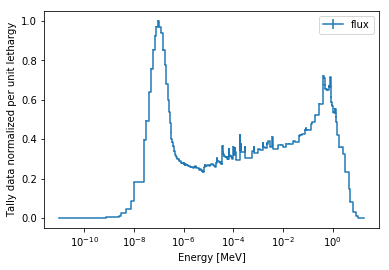

In [22]:
spectrum.spectrumPlot(labels=labels);

# Depletion

In [23]:
%time
dep = serpentTools.read(depFile)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [24]:
dep.metadata

{'burnup': array([ 0. ,  0.5,  1. ,  5. , 10. , 20. ]),
 'days': array([0.    , 0.0005, 0.001 , 0.005 , 0.01  , 0.02  ]),
 'names': ['U235',
  'Pu239',
  'Pu240',
  'Pu241',
  'Am241',
  'Am243',
  'Gd155',
  'Gd157',
  'Xe135',
  'Sm149',
  'I131',
  'Cs134',
  'Cs137',
  'lost',
  'total'],
 'zai': ['922350',
  '942390',
  '942400',
  '942410',
  '952410',
  '952430',
  '641550',
  '641570',
  '541350',
  '621490',
  '531310',
  '551340',
  '551370',
  '666',
  '0']}

In [25]:
dep.materials

{'fue1': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a3da41d0>,
 'fue2': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a4298908>,
 'fue3': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a4304eb8>,
 'fue4': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a4304da0>,
 'fueG': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a41eb828>,
 'total': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a41eba58>}

In [26]:
f1 = dep.materials['fue1']
f1.names

['U235',
 'Pu239',
 'Pu240',
 'Pu241',
 'Am241',
 'Am243',
 'Gd155',
 'Gd157',
 'Xe135',
 'Sm149',
 'I131',
 'Cs134',
 'Cs137',
 'lost',
 'total']

In [27]:
f1.data.keys()  # all data stored on object

dict_keys(['volume', 'burnup', 'adens', 'mdens', 'a', 'h', 'sf', 'gsrc', 'ingTox', 'inhTox'])

In [28]:
f1.data['adens']

array([[1.43700e-03, 1.42210e-03, 1.40718e-03, 1.28745e-03, 1.13744e-03,
        8.44085e-04],
       [0.00000e+00, 2.61223e-12, 2.05678e-11, 2.27384e-09, 1.51938e-08,
        8.18387e-08],
       [0.00000e+00, 9.50474e-13, 1.47882e-11, 7.44618e-09, 9.05029e-08,
        8.56591e-07],
       [0.00000e+00, 1.61407e-14, 5.02047e-13, 1.28111e-09, 3.10105e-08,
        5.11492e-07],
       [0.00000e+00, 1.78753e-22, 1.11191e-20, 1.42013e-16, 6.81194e-15,
        2.21458e-13],
       [0.00000e+00, 9.05142e-24, 2.25870e-21, 7.87728e-16, 1.72196e-13,
        2.81767e-11],
       [0.00000e+00, 1.22329e-15, 2.09578e-15, 4.50852e-15, 5.52046e-15,
        5.77027e-15],
       [0.00000e+00, 4.20341e-14, 7.23123e-14, 9.67244e-13, 3.06275e-12,
        7.92044e-12],
       [0.00000e+00, 3.45876e-10, 3.88238e-10, 7.00394e-10, 9.37804e-10,
        1.10564e-09],
       [0.00000e+00, 1.04494e-15, 9.01507e-15, 1.57576e-12, 7.96744e-12,
        2.43682e-11],
       [0.00000e+00, 6.37800e-10, 1.61021e-09, 3.4

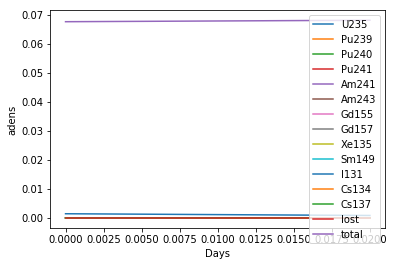

In [29]:
f1.plot('days', 'adens');
# takes all isotopes, not super helpful for large inventories

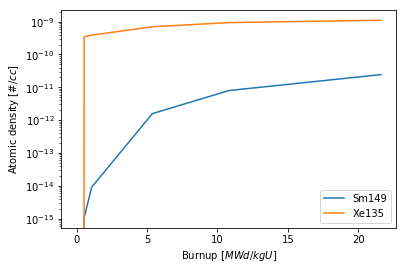

In [30]:
f1.plot('burnup', 'adens', names=['Sm149', 'Xe135'], logy=True, 
              ylabel=r'Atomic density $[\#/cc]$'); # render as math font

Also support plotting data from many materials directly from the reader object

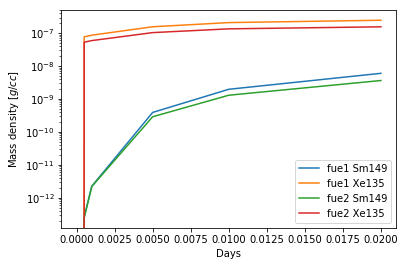

In [47]:
dep.plot('days', 'mdens', materials=['fue1', 'fue2'],
                 names=['Sm149', 'Xe135'], logy=True, 
                 ylabel=r'Mass density $[g/cc]$');

# Branching Coefficient Reader

In [32]:
%time
coe = serpentTools.read(coeFile)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.53 µs


In [33]:
coe.branches.keys()

dict_keys(['nom', 'tempLow_ModLow', 'tempHigh_ModHigh', 'tempNom_ModLow', 'tempNom_ModHigh', 'tempLow_ModNom', 'tempHigh_ModNom', 'tempHigh_ModLow', 'tempLow_ModHigh'])

In [34]:
b = coe.branches['tempLow_ModLow']
b.universes

{(3102, 0, 0): <serpentTools.objects.containers.HomogUniv at 0x7f69a3cd54e0>,
 (3102,
  40.0,
  1): <serpentTools.objects.containers.HomogUniv at 0x7f69a3d037b8>,
 (3102,
  82.125,
  2): <serpentTools.objects.containers.HomogUniv at 0x7f69a3ebd358>,
 (3102,
  120.0,
  3): <serpentTools.objects.containers.HomogUniv at 0x7f69a3ebb278>,
 (3102,
  164.25,
  4): <serpentTools.objects.containers.HomogUniv at 0x7f69a3e9d048>,
 (3102,
  200.0,
  5): <serpentTools.objects.containers.HomogUniv at 0x7f69a3ebc048>,
 (3102,
  246.375,
  6): <serpentTools.objects.containers.HomogUniv at 0x7f69a3d036a0>,
 (3102,
  280.0,
  7): <serpentTools.objects.containers.HomogUniv at 0x7f69a3e8f278>,
 (3102,
  328.5,
  8): <serpentTools.objects.containers.HomogUniv at 0x7f69a3ebf048>}

In [35]:
b.stateData

{'DATE': '18/03/06',
 'FuelTemp': '600',
 'TIME': '18:55:21',
 'VERSION': '2.1.29',
 'coolDen': '90'}

In [36]:
u0 = b.universes[(3102, 0,0)]
u0.infExp.keys()

dict_keys(['infFlx', 'infKinf', 'infRepTime', 'infPromptLife', 'infTot', 'infCapt', 'infFiss', 'infNsf', 'infKappa', 'infInvv', 'infNubar', 'infAbs', 'infRemxs', 'infRabsxs', 'infChit', 'infChip', 'infChid', 'infI135Yield', 'infXe135Yield', 'infPm149Yield', 'infSm149Yield', 'infI135MicroAbs', 'infXe135MicroAbs', 'infPm149MicroAbs', 'infSm149MicroAbs', 'infI135MacroAbs', 'infXe135MacroAbs', 'infPm149MacroAbs', 'infSm149MacroAbs', 'infS0', 'infS1', 'infS2', 'infS3', 'infS4', 'infS5', 'infS6', 'infS7', 'infSp0', 'infSp1', 'infSp2', 'infSp3', 'infSp4', 'infSp5', 'infSp6', 'infSp7', 'infScatt0', 'infScatt1', 'infScatt2', 'infScatt3', 'infScatt4', 'infScatt5', 'infScatt6', 'infScatt7', 'infScattp0', 'infScattp1', 'infScattp2', 'infScattp3', 'infScattp4', 'infScattp5', 'infScattp6', 'infScattp7', 'infTranspxs', 'infDiffcoef'])

In [37]:
u0.b1Exp.keys()

dict_keys(['b1Kinf', 'b1Keff', 'b1RepTime', 'b1PromptLife', 'b1B2', 'b1Err', 'b1Flx', 'b1FissFlx', 'b1Tot', 'b1Capt', 'b1Fiss', 'b1Nsf', 'b1Kappa', 'b1Invv', 'b1Nubar', 'b1Abs', 'b1Remxs', 'b1Rabsxs', 'b1Chit', 'b1Chip', 'b1Chid', 'b1I135Yield', 'b1Xe135Yield', 'b1Pm149Yield', 'b1Sm149Yield', 'b1I135MicroAbs', 'b1Xe135MicroAbs', 'b1Pm149MicroAbs', 'b1Sm149MicroAbs', 'b1I135MacroAbs', 'b1Xe135MacroAbs', 'b1Pm149MacroAbs', 'b1Sm149MacroAbs', 'b1S0', 'b1S1', 'b1S2', 'b1S3', 'b1S4', 'b1S5', 'b1S6', 'b1S7', 'b1Sp0', 'b1Sp1', 'b1Sp2', 'b1Sp3', 'b1Sp4', 'b1Sp5', 'b1Sp6', 'b1Sp7', 'b1Scatt0', 'b1Scatt1', 'b1Scatt2', 'b1Scatt3', 'b1Scatt4', 'b1Scatt5', 'b1Scatt6', 'b1Scatt7', 'b1Scattp0', 'b1Scattp1', 'b1Scattp2', 'b1Scattp3', 'b1Scattp4', 'b1Scattp5', 'b1Scattp6', 'b1Scattp7', 'b1Transpxs', 'b1Diffcoef'])

In [38]:
u0.get('b1S0')

array([6.99724e-02, 8.84172e-03, 7.30188e-03, 9.16605e-03, 9.19889e-03,
       7.54794e-03, 4.87785e-03, 3.13674e-03, 1.77841e-03, 9.23792e-04,
       3.64315e-04, 8.09659e-05, 5.70552e-05, 1.34575e-05, 1.15100e-05,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       9.15810e-02, 1.21420e-02, 1.20235e-02, 1.13811e-02, 8.39279e-03,
       5.94869e-03, 3.66715e-03, 2.00308e-03, 9.27710e-04, 4.08905e-04,
       1.81932e-04, 8.22160e-05, 4.31813e-05, 1.50816e-05, 1.96973e-06,
       2.78177e-06, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.07587e-01, 1.46919e-02, 1.22072e-02, 1.24141e-02, 9.32206e-03,
       5.71034e-03, 3.22038e-03, 1.55192e-03, 6.57620e-04, 2.74033e-04,
       1.11600e-04, 4.42290e-05, 1.98801e-05, 8.78569e-06, 3.73770e-06,
       1.54536e-06, 4.21220e-07, 0.00000e+00, 2.27014e-07, 0.000

# User control

* [List of default settings](http://serpent-tools.readthedocs.io/en/latest/settingsTop.html)
* [Variable groups for results/branching files](http://serpent-tools.readthedocs.io/en/latest/variableGroupsTop.html)

In [39]:
from serpentTools.settings import rc

In [40]:
rc.setValue('verbosity', 'debug')
rc.setValue('depletion.materials', ['fue\d'])  
# only materials with "fue<N>" where <N> is a digit 0-9
rc.setValue('depletion.materialVariables', ['ADENS', 'MDENS'])
rc.setValue('depletion.processTotal', False)
rc.setValue('detector.names', ['xymesh'])
rc.setValue('verbosity', 'warning')

DEBUG   : serpentTools: Updated setting verbosity to debug
DEBUG   : serpentTools: Updated setting depletion.materials to ['fue\\d']
DEBUG   : serpentTools: Updated setting depletion.materialVariables to ['ADENS', 'MDENS']
DEBUG   : serpentTools: Updated setting depletion.processTotal to False
DEBUG   : serpentTools: Updated setting detector.names to ['xymesh']


## Load from configuration file

In [41]:
configF = './settings.yaml'
rc.loadYaml(configF)

In [42]:
newDep = serpentTools.read(depFile)
newDep.materials

{'fue1': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a3c2f2e8>,
 'fue2': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a3c2f518>,
 'fue3': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a3c2f5c0>,
 'fue4': <serpentTools.objects.materials.DepletedMaterial at 0x7f69a3c2f2b0>}

In [43]:
newDep.materials['fue1'].data.keys()

dict_keys(['adens', 'mdens'])

In [44]:
newDep.metadata.keys()

dict_keys(['zai', 'names', 'days'])

In [45]:
newDet = serpentTools.read(detFile)
newDet.detectors

{'xymesh': <serpentTools.objects.containers.Detector at 0x7f69a3c2f6d8>}

In [46]:
newCoe = serpentTools.read(coeFile)
newB = newCoe.branches['nom']
newUniv = newB.universes[(3102, 0, 0)]
newUniv.infExp.keys()

dict_keys(['infFlx', 'infTot', 'infCapt', 'infFiss', 'infNsf', 'infKappa', 'infInvv', 'infNubar', 'infAbs', 'infRemxs', 'infRabsxs', 'infChit', 'infChip', 'infChid', 'infS0', 'infS1', 'infS2', 'infS3', 'infS4', 'infS5', 'infS6', 'infS7', 'infScatt0', 'infScatt1', 'infScatt2', 'infScatt3', 'infScatt4', 'infScatt5', 'infScatt6', 'infScatt7', 'infTranspxs', 'infDiffcoef'])